In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# HSV変換

In [2]:
def rgb2hsv(img):
    img = img/255
    hsv = np.zeros_like(img, dtype=np.float32)
    
    max_v = np.max(img,axis=2)
    min_v = np.min(img,axis=2)
    min_arg = np.argmin(img,axis=2)
    
    # Hの計算 ...は次元を省略して書く記法
    hsv[...,0][np.where(max_v==min_v)]=0
    ## if min == B
    ind = np.where(min_arg == 0)
    hsv[..., 0][ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
    ## if min == R
    ind = np.where(min_arg == 2)
    hsv[..., 0][ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
    ## if min == G
    ind = np.where(min_arg == 1)
    hsv[..., 0][ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
    # Sの計算
    hsv[...,1] = max_v-min_v
    
    # Vの計算
    hsv[...,2] = max_v
    
    return hsv

# HSV逆変換

In [3]:
def hsv2rgb(img):
    max_v = np.max(img,axis=2)
    min_v = np.min(img,axis=2)
    rgb = np.zeros_like(img)
    
    C = img[...,1]
    Hdash = img[...,0]/60
    X = C * (1 - np.abs( Hdash % 2 - 1))
    Z = np.zeros_like(img[...,0])
    
    vals = [[Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C]]

    for i in range(6):
        ind = np.where((i <= Hdash) & (Hdash < (i+1)))
        rgb[..., 0][ind] = (img[...,2] - C)[ind] + vals[i][0][ind]
        rgb[..., 1][ind] = (img[...,2] - C)[ind] + vals[i][1][ind]
        rgb[..., 2][ind] = (img[...,2] - C)[ind] + vals[i][2][ind]
    
    rgb[np.where(max_v == min_v)] = 0
    rgb = np.clip(rgb, 0, 1)
    rgb = (rgb * 255).astype(np.uint8)

    return rgb

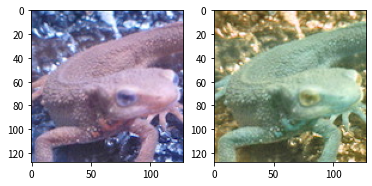

In [4]:
# 180°色反転を行う
img = cv2.imread("./img/imori.jpg")
hsv_img = rgb2hsv(img)
# Hを180°反転
hsv_img[...,0] = (hsv_img[...,0]+180)%360
out = hsv2rgb(hsv_img)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()